In [1]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aj_path = "/Users/vocat/MCC/Projects/Resources/Project-1/Crime_Report.csv"

In [3]:
def make_df(aj_path): # Reads the csv file in and makes it a DataFrame
    df = pd.read_csv(aj_path, low_memory=False)
    return df

In [4]:
directory = os.path.dirname(aj_path)
dir_string = str(directory) + "/Crime_Report.csv"

In [5]:
all_data_df = make_df(dir_string)
date_crime = pd.concat([all_data_df['Occurred Date'], all_data_df['Highest Offense Description']], axis=1)
crimes = date_crime['Highest Offense Description'].unique()

In [6]:
filtered_identity_theft = date_crime[date_crime['Highest Offense Description'].str.contains('identity theft', case=False)]

In [7]:
identity_theft = pd.concat([filtered_identity_theft], ignore_index=True)
identity_theft['Occurred Date'] = pd.to_datetime(identity_theft['Occurred Date'], format='mixed')

In [8]:
identity_theft['Season'] = pd.cut(
    identity_theft['Occurred Date'].dt.dayofyear,
    bins= [0, 79, 171, 264, 355, 365],
    labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'],
    ordered=False)

In [9]:
season_theft_crimes = identity_theft.drop(columns=['Occurred Date'])

# Define a function that maps a date to a season
def get_season(date):
    year = date.year
    if date >= pd.Timestamp(year=year, month=3, day=21) and date <= pd.Timestamp(year=year, month=6, day=20):
        return 'Spring'
    elif date >= pd.Timestamp(year=year, month=6, day=21) and date <= pd.Timestamp(year=year, month=9, day=22):
        return 'Summer'
    elif date >= pd.Timestamp(year=year, month=9, day=23) and date <= pd.Timestamp(year=year, month=12, day=20):
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to the DataFrame
identity_theft['Season'] = identity_theft['Occurred Date'].apply(get_season)

# Filter data between years 2003 and 2023
filtered_years = identity_theft[(identity_theft['Occurred Date'].dt.year >= 2003) & (identity_theft['Occurred Date'].dt.year <= 2023)]




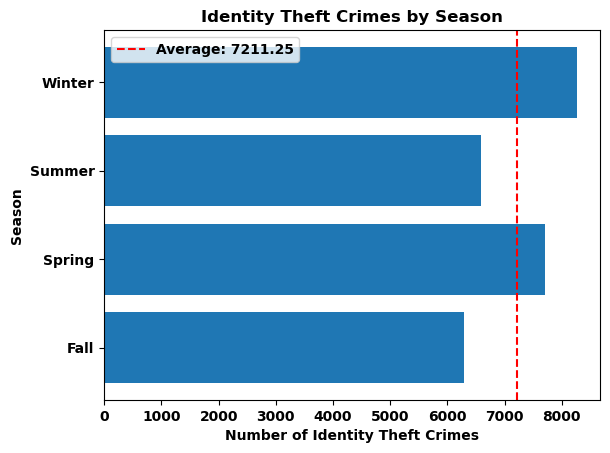

In [10]:
import matplotlib.pyplot as plt

# Group by 'Season' and count occurrences
season_counts = filtered_years.groupby('Season')['Occurred Date'].size()
season_avg = season_counts.mean()

# Plotting
plt.barh(season_counts.index, season_counts)
plt.axvline(x=season_avg, color='red', linestyle='--', label=f'Average: {season_avg:.2f}')
plt.legend()
plt.title('Identity Theft Crimes by Season')
plt.xlabel('Number of Identity Theft Crimes')
plt.ylabel('Season')
plt.show()

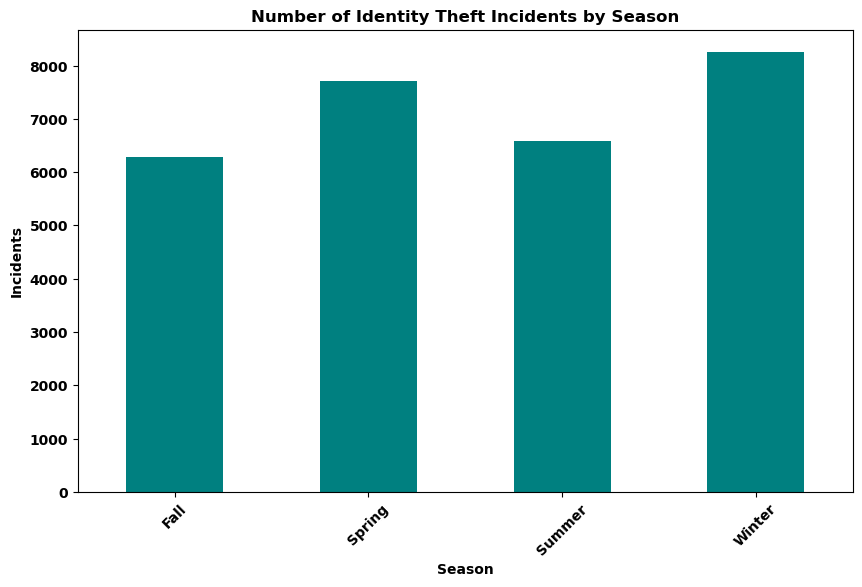

In [11]:
#Seasonal Bar Chart

# Count the number of identity thefts per season
season_counts = filtered_years['Season'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='teal')
plt.title('Number of Identity Theft Incidents by Season')
plt.xlabel('Season')
plt.ylabel('Incidents')
plt.xticks(rotation=45)
plt.show()

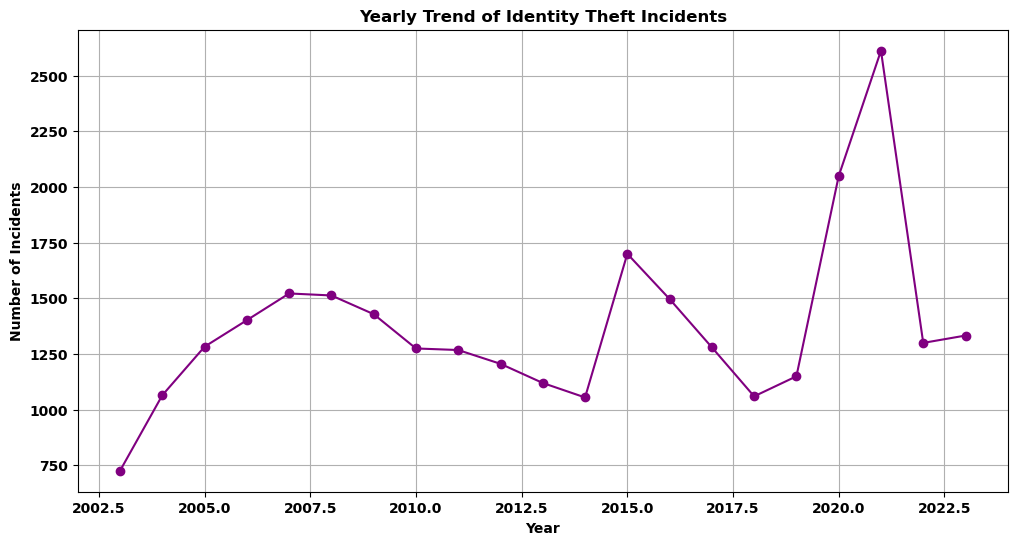

In [12]:
#Yearly Trend line

# Count the number of incidents per year
yearly_counts = filtered_years['Occurred Date'].dt.year.value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Yearly Trend of Identity Theft Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


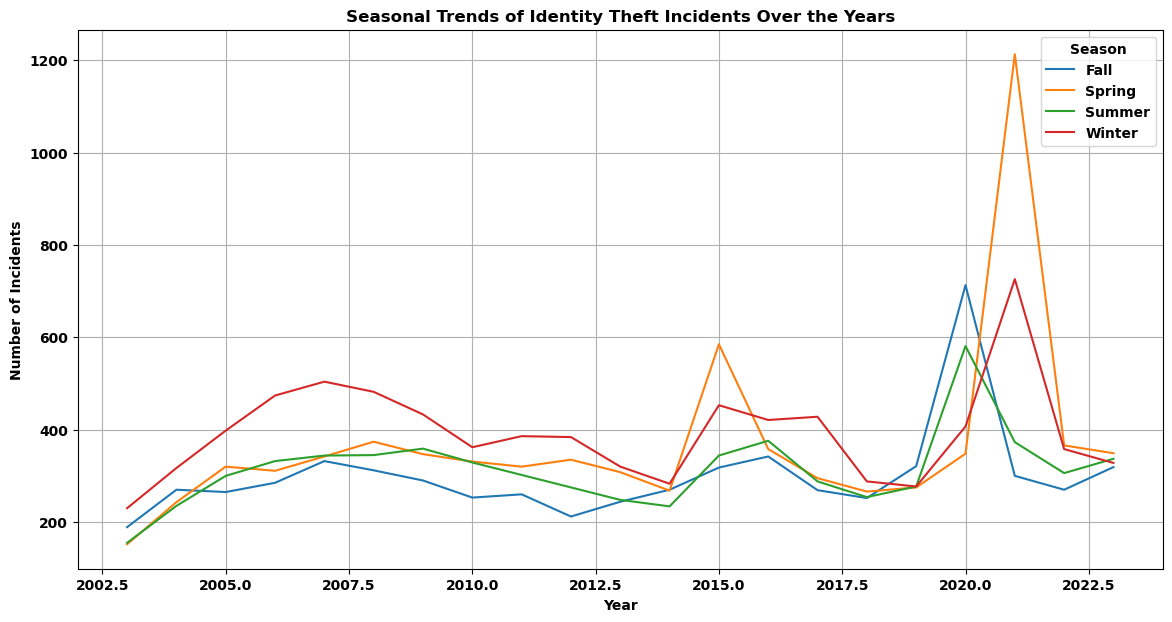

In [13]:
# Seasonal Trend Over Years

# Create a pivot table with years as rows and seasons as columns
seasonal_trends = filtered_years.pivot_table(index=filtered_years['Occurred Date'].dt.year, columns='Season', values='Highest Offense Description', aggfunc='count')

# Fill NaN values with 0
seasonal_trends.fillna(0, inplace=True)

# Plot the trends
plt.figure(figsize=(14, 7))
for column in seasonal_trends.columns:
    plt.plot(seasonal_trends.index, seasonal_trends[column], label=column)

plt.title('Seasonal Trends of Identity Theft Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Season')
plt.grid(True)
plt.show()


In [14]:
#CHI SQUARE TEST FOR IDENTITY THEFT BY SEASON
from scipy.stats import chi2_contingency


# Your data from the identity theft by season chart
data = np.array([6380, 7645, 6494, 8208])  # Fall, Spring, Summer, Winter

# As we're dealing with one categorical group only, we need to generate expected frequencies assuming no effect of seasons
total = data.sum()
expected = np.full(shape=data.shape, fill_value=total / 4)

# Chi-square test
chi2, p_value = chi2_contingency([data, expected])[:2]

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 164.89333824893055
p-value: 1.6107138924223533e-35
